In [16]:
import unclip 
import matplotlib.pyplot as plt
import torch
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
uc = unclip.UnClip()


Couldn't connect to the Hub: (MaxRetryError('HTTPSConnectionPool(host=\'huggingface.co\', port=443): Max retries exceeded with url: /api/models/kakaobrain/karlo-v1-alpha (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7817101879e0>: Failed to resolve \'huggingface.co\' ([Errno -2] Name or service not known)"))'), '(Request ID: dec1a41f-431d-404b-992d-29ab55435569)').
Will try to load from local cache.


Loading pipeline components...:   0%|          | 0/10 [00:00<?, ?it/s]

In [18]:

with torch.no_grad():
    image_embeddings, prompt_embeds, text_enc_hid_states, text_mask = uc.text2emb(["a high-resolution photograph of a dog and a good  horse", "a low-resolution photograph of a cat with a coffee cup"])

In [19]:
print(image_embeddings.shape, prompt_embeds.shape, text_enc_hid_states.shape, text_mask.shape)

torch.Size([2, 768]) torch.Size([4, 768]) torch.Size([4, 77, 768]) torch.Size([4, 77])


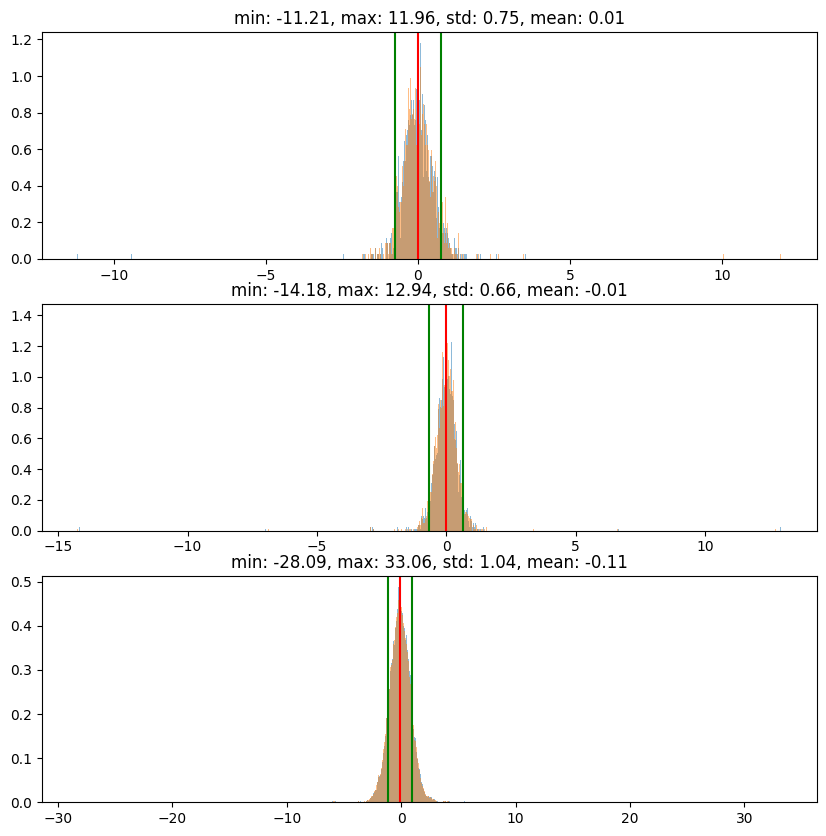

In [26]:
fig, axs = plt.subplots(3,1, figsize=(10,10))

fake_image_embeddings = (torch.randn_like(image_embeddings) * torch.std(image_embeddings) + torch.mean(image_embeddings)) * 0.1 + image_embeddings
fake_prompt_embeds = (torch.randn_like(prompt_embeds) * torch.std(prompt_embeds) + torch.mean(prompt_embeds)) * 0.1 + prompt_embeds
fake_text_enc_hid_states = (torch.randn_like(text_enc_hid_states) * torch.std(text_enc_hid_states) + torch.mean(text_enc_hid_states)) * 0.1 + text_enc_hid_states
for values,fake_values, ax in zip([image_embeddings, prompt_embeds, text_enc_hid_states], [fake_image_embeddings, fake_prompt_embeds, fake_text_enc_hid_states], axs):
    ax.hist(values.flatten(), bins=1000, density=True, alpha=0.5)
    min_val = values.min().item()
    max_val = values.max().item()
    std = values.std().item()
    mean = values.mean().item()
    ax.hist(fake_values.flatten(), bins=1000, density=True, alpha=0.5)
    ax.set_title(f"min: {min_val:.2f}, max: {max_val:.2f}, std: {std:.2f}, mean: {mean:.2f}")
    # add verical lines for mean and std
    ax.axvline(mean, color='r')
    ax.axvline(mean + std, color='g')
    ax.axvline(mean - std, color='g')
plt.show()



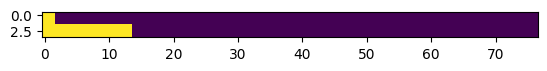

In [27]:
plt.imshow(text_mask)

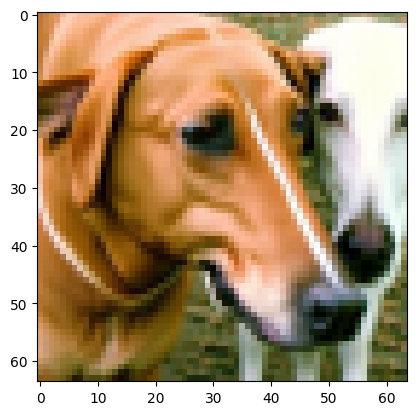

In [35]:
with torch.no_grad():
    img = uc.emb2img(image_embeddings, prompt_embeds, text_enc_hid_states, torch.ones_like(text_mask))  

plt.imshow(img[0].cpu().numpy().transpose(1,2,0)*0.5+0.5)

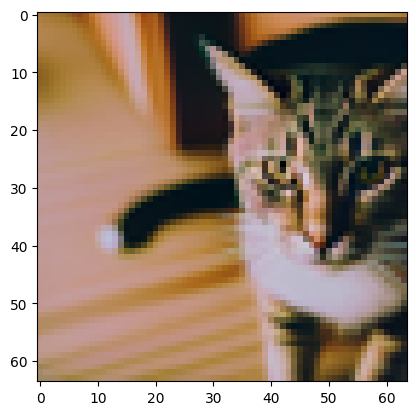

In [36]:
plt.imshow(img[1].cpu().numpy().transpose(1,2,0)*0.5+0.5)

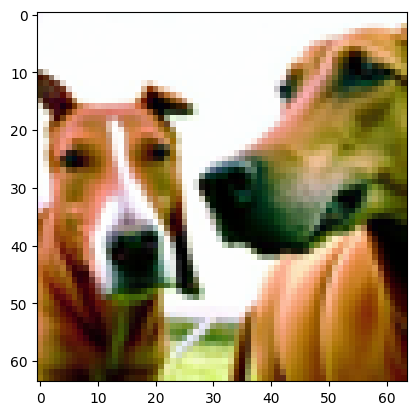

In [30]:
with torch.no_grad():
    img2 = uc.emb2img(fake_image_embeddings, fake_prompt_embeds, fake_text_enc_hid_states, torch.ones_like(text_mask))

plt.imshow(img2[0].cpu().numpy().transpose(1,2,0)*0.5+0.5)

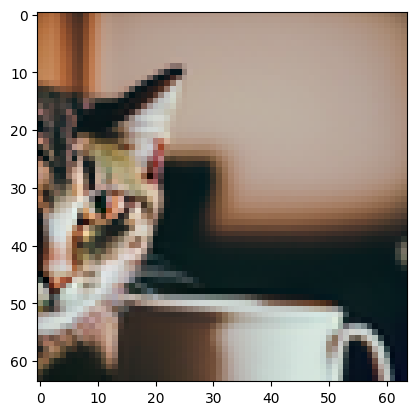

In [31]:
plt.imshow(img2[1].cpu().numpy().transpose(1,2,0)*0.5+0.5)

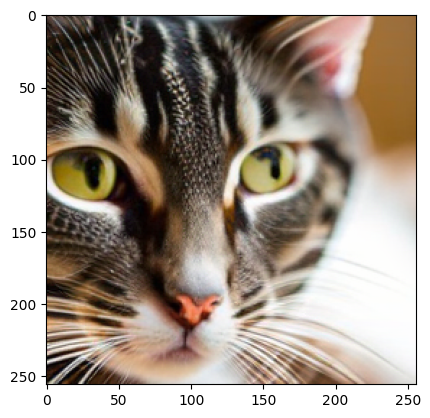

In [54]:
with torch.no_grad():
    big_imge = uc.sr(img)

plt.imshow(big_imge[1].cpu().numpy().transpose(1,2,0)*0.5+0.5)